# **Object Detection**

In [1]:
pip install --user opencv-python==4.9.0.80

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.6 MB/s eta 0:00:00


In [2]:
import tensorflow.keras as K
import numpy as np

In [3]:
class Yolo:
    """ Doc """
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """ The initializes the Yolo class """
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]

In [4]:
    np.random.seed(0)
    anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                        [[30, 61], [62, 45], [59, 119]],
                        [[10, 13], [16, 30], [33, 23]]])
    yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)
    yolo.model.summary()
    print('Class names:', yolo.class_names)
    print('Class threshold:', yolo.class_t)
    print('NMS threshold:', yolo.nms_t)
    print('Anchor boxes:', yolo.anchors)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 416, 416, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 416, 416, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 416, 416, 32)         0         ['batch_normalization[0][0

In [5]:
class Yolo:
    """ Doc """
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """ The initializes the Yolo class """
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]

    @staticmethod
    def sigmoid(x):
        """
            Doc
        """
        return (1. / (1. + np.exp(-x)))

    def process_outputs(self, outputs, image_size):
        """ Doc """
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices(
                (g_w, g_h)).T,
                anchors.shape[0]).reshape((g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs

In [6]:
    np.random.seed(0)
    anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                        [[30, 61], [62, 45], [59, 119]],
                        [[10, 13], [16, 30], [33, 23]]])
    yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)
    output1 = np.random.randn(13, 13, 3, 85)
    output2 = np.random.randn(26, 26, 3, 85)
    output3 = np.random.randn(52, 52, 3, 85)
    boxes, box_confidences, box_class_probs = yolo.process_outputs([output1, output2, output3], np.array([500, 700]))
    print('Boxes:', boxes)
    print('Box confidences:', box_confidences)
    print('Box class probabilities:', box_class_probs)


Boxes: [array([[[[-2.13743365e+02, -4.85478868e+02,  3.05682061e+02,
           5.31534670e+02],
         [-6.28222336e+01, -1.13713822e+01,  1.56452678e+02,
           7.01966357e+01],
         [-7.00753664e+02, -7.99011810e+01,  7.77777040e+02,
           1.24440730e+02]],

        [[ 6.52921110e+01,  1.43688377e+00,  1.14233396e+02,
           2.36524697e+01],
         [ 2.79501974e+01, -2.03937627e+01,  1.59898932e+02,
           5.02826906e+01],
         [ 6.17629106e+01, -8.31889643e+01,  1.02303202e+02,
           1.38551621e+02]],

        [[ 1.20166765e+02,  2.31461495e+01,  1.71676644e+02,
           3.82523882e+01],
         [ 3.39847297e+01, -3.21481177e+01,  2.45335593e+02,
           6.17333839e+01],
         [-5.41077407e+02, -4.37386113e+02,  7.94834201e+02,
           4.95448229e+02]],

        ...,

        [[ 4.37830908e+02, -1.12792212e+02,  6.59360033e+02,
           1.26273767e+02],
         [ 4.40039718e+02, -1.34968536e+02,  6.70734974e+02,
           1.75141946

In [7]:
class Yolo:
    """ Doc """
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """ The initializes the Yolo class """
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]

    @staticmethod
    def sigmoid(x):
        """
            Doc
        """
        return (1. / (1. + np.exp(-x)))

    def process_outputs(self, outputs, image_size):
        """ Doc """
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices(
                (g_w, g_h)).T,
                anchors.shape[0]).reshape((g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs


    def filter_boxes(self, boxes, box_confidences, box_class_probs):
        """ Doc """
        filtered_boxes = []
        box_classes = []
        box_scores = []

        for i, b in enumerate(boxes):
            bc = box_confidences[i]
            bcp = box_class_probs[i]

            bs = bc * bcp

            bcs = np.max(bs, axis=-1)
            bc1 = np.argmax(bs, axis=-1)

            idx = np.where(bcs >= self.class_t)

            filtered_boxes.append(b[idx])
            box_classes.append(bc1[idx])
            box_scores.append(bcs[idx])

        return np.concatenate(filtered_boxes), np.concatenate(box_classes), np.concatenate(box_scores)


In [8]:
    np.random.seed(0)
    anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                        [[30, 61], [62, 45], [59, 119]],
                        [[10, 13], [16, 30], [33, 23]]])
    yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)
    output1 = np.random.randn(13, 13, 3, 85)
    output2 = np.random.randn(26, 26, 3, 85)
    output3 = np.random.randn(52, 52, 3, 85)
    boxes, box_confidences, box_class_probs = yolo.process_outputs([output1, output2, output3], np.array([500, 700]))
    boxes, box_classes, box_scores = yolo.filter_boxes(boxes, box_confidences, box_class_probs)
    print('Boxes:', boxes)
    print('Box classes:', box_classes)
    print('Box scores:', box_scores)

Boxes: [[-213.74336488 -485.47886784  305.68206077  531.53467019]
 [ -62.82223363  -11.37138215  156.45267787   70.19663572]
 [ 190.62733946    7.65943712  319.201764     43.75737906]
 ...
 [ 647.78041714  491.58472667  662.00736941  502.60750466]
 [ 586.27543101  487.95333873  715.85860922  499.39422783]
 [ 666.1128673   481.29683099  728.88754319  501.09378706]]
Box classes: [19 54 29 ... 63 25 46]
Box scores: [0.7850503  0.67898563 0.81301861 ... 0.8012832  0.61427808 0.64562072]


In [9]:
class Yolo:
    """ Doc """
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """ The initializes the Yolo class """
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]

    @staticmethod
    def sigmoid(x):
        """
            Doc
        """
        return (1. / (1. + np.exp(-x)))

    def process_outputs(self, outputs, image_size):
        """ Doc """
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices(
                (g_w, g_h)).T,
                anchors.shape[0]).reshape((g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs

    def filter_boxes(self, boxes, box_confidences, box_class_probs):
        """ Doc """
        filtered_boxes = []
        box_classes = []
        box_scores = []

        for i, b in enumerate(boxes):
            bc = box_confidences[i]
            bcp = box_class_probs[i]

            bs = bc * bcp

            bcs = np.max(bs, axis=-1)
            bc1 = np.argmax(bs, axis=-1)

            idx = np.where(bcs >= self.class_t)

            filtered_boxes.append(b[idx])
            box_classes.append(bc1[idx])
            box_scores.append(bcs[idx])

        return np.concatenate(
            filtered_boxes), np.concatenate(
                box_classes), np.concatenate(box_scores)

    def iou(self, box1, box2):
        """Calculates the Intersection over
        Union (IoU) of two bounding boxes"""
        xi1 = max(box1[0], box2[0])
        yi1 = max(box1[1], box2[1])
        xi2 = min(box1[2], box2[2])
        yi2 = min(box1[3], box2[3])
        inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

        box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
        union_area = box1_area + box2_area - inter_area

        iou = inter_area / union_area
        return iou

    def non_max_suppression(self, filtered_boxes, box_classes, box_scores):
        """Performs non-maximum suppression"""
        box_predictions = []
        predicted_box_classes = []
        predicted_box_scores = []

        classes = np.unique(box_classes)

        for c in classes:
            idx = np.where(box_classes == c)
            b = filtered_boxes[idx]
            bc1 = box_classes[idx]
            bs = box_scores[idx]

            ordered_indices = np.flip(bs.argsort(), axis=0)

            while len(ordered_indices) > 0:
                maximum = ordered_indices[0]
                box_predictions.append(b[maximum])
                predicted_box_classes.append(bc1[maximum])
                predicted_box_scores.append(bs[maximum])

                if len(ordered_indices) == 1:
                    break

                remaining = ordered_indices[1:]

                ious = np.zeros((len(remaining)))
                for i, idx in enumerate(remaining):
                    xi1 = max(b[maximum, 0], b[idx, 0])
                    yi1 = max(b[maximum, 1], b[idx, 1])
                    xi2 = min(b[maximum, 2], b[idx, 2])
                    yi2 = min(b[maximum, 3], b[idx, 3])
                    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

                    box1_area = (
                        b[maximum, 2] - b[maximum, 0]) * (
                            b[maximum, 3] - b[maximum, 1])
                    box2_area = (
                        b[idx, 2] - b[idx, 0]) * (b[idx, 3] - b[idx, 1])
                    union_area = box1_area + box2_area - inter_area

                    ious[i] = inter_area / union_area

                ordered_indices = remaining[ious <= self.nms_t]

        box_predictions = np.array(box_predictions)
        predicted_box_classes = np.array(predicted_box_classes)
        predicted_box_scores = np.array(predicted_box_scores)

        return box_predictions, predicted_box_classes, predicted_box_scores



In [10]:
    np.random.seed(0)
    anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                        [[30, 61], [62, 45], [59, 119]],
                        [[10, 13], [16, 30], [33, 23]]])
    yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)
    output1 = np.random.randn(13, 13, 3, 85)
    output2 = np.random.randn(26, 26, 3, 85)
    output3 = np.random.randn(52, 52, 3, 85)
    boxes, box_confidences, box_class_probs = yolo.process_outputs([output1, output2, output3], np.array([500, 700]))
    boxes, box_classes, box_scores = yolo.filter_boxes(boxes, box_confidences, box_class_probs)
    boxes, box_classes, box_scores = yolo.non_max_suppression(boxes, box_classes, box_scores)
    print('Boxes:', boxes)
    print('Box classes:', box_classes)
    print('Box scores:', box_scores)

Boxes: [[483.49145347 128.010205   552.78146847 147.87465464]
 [-38.91328475 332.66704009 102.94594841 363.78584864]
 [ 64.10861893 329.13266621 111.87941603 358.37523958]
 ...
 [130.0729606  467.20024928 172.42160784 515.90336094]
 [578.82381106  76.25699693 679.22893305 104.63320075]
 [169.12132771 304.32765204 251.1457077  342.16397829]]
Box classes: [ 0  0  0 ... 79 79 79]
Box scores: [0.80673525 0.80405611 0.78972362 ... 0.61758194 0.61455015 0.6001824 ]


In [11]:
import tensorflow.keras as K
import numpy as np
import os
import cv2


class Yolo:
    """ Doc """
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """ The initializes the Yolo class """
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]

    @staticmethod
    def sigmoid(x):
        """
            Doc
        """
        return (1. / (1. + np.exp(-x)))

    def process_outputs(self, outputs, image_size):
        """ Doc """
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices(
                (g_w, g_h)).T,
                anchors.shape[0]).reshape((g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs

    def filter_boxes(self, boxes, box_confidences, box_class_probs):
        """ Doc """
        filtered_boxes = []
        box_classes = []
        box_scores = []

        for i, b in enumerate(boxes):
            bc = box_confidences[i]
            bcp = box_class_probs[i]

            bs = bc * bcp

            bcs = np.max(bs, axis=-1)
            bc1 = np.argmax(bs, axis=-1)

            idx = np.where(bcs >= self.class_t)

            filtered_boxes.append(b[idx])
            box_classes.append(bc1[idx])
            box_scores.append(bcs[idx])

        return np.concatenate(
            filtered_boxes), np.concatenate(
                box_classes), np.concatenate(box_scores)

    def iou(self, box1, box2):
        """Calculates the Intersection over
        Union (IoU) of two bounding boxes"""
        xi1 = max(box1[0], box2[0])
        yi1 = max(box1[1], box2[1])
        xi2 = min(box1[2], box2[2])
        yi2 = min(box1[3], box2[3])
        inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

        box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
        union_area = box1_area + box2_area - inter_area

        iou = inter_area / union_area
        return iou

    def non_max_suppression(self, filtered_boxes, box_classes, box_scores):
        """Performs non-maximum suppression"""
        box_predictions = []
        predicted_box_classes = []
        predicted_box_scores = []

        classes = np.unique(box_classes)

        for c in classes:
            idx = np.where(box_classes == c)
            b = filtered_boxes[idx]
            bc1 = box_classes[idx]
            bs = box_scores[idx]

            ordered_indices = np.flip(bs.argsort(), axis=0)

            while len(ordered_indices) > 0:
                maximum = ordered_indices[0]
                box_predictions.append(b[maximum])
                predicted_box_classes.append(bc1[maximum])
                predicted_box_scores.append(bs[maximum])

                if len(ordered_indices) == 1:
                    break

                remaining = ordered_indices[1:]

                ious = np.zeros((len(remaining)))
                for i, idx in enumerate(remaining):
                    xi1 = max(b[maximum, 0], b[idx, 0])
                    yi1 = max(b[maximum, 1], b[idx, 1])
                    xi2 = min(b[maximum, 2], b[idx, 2])
                    yi2 = min(b[maximum, 3], b[idx, 3])
                    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

                    box1_area = (
                        b[maximum, 2] - b[maximum, 0]) * (
                            b[maximum, 3] - b[maximum, 1])
                    box2_area = (
                        b[idx, 2] - b[idx, 0]) * (b[idx, 3] - b[idx, 1])
                    union_area = box1_area + box2_area - inter_area

                    ious[i] = inter_area / union_area

                ordered_indices = remaining[ious <= self.nms_t]

        box_predictions = np.array(box_predictions)
        predicted_box_classes = np.array(predicted_box_classes)
        predicted_box_scores = np.array(predicted_box_scores)

        return box_predictions, predicted_box_classes, predicted_box_scores

    @staticmethod
    def load_images(folder_path):
        """
        - folder_path: a string representing the
            path to the folder holding all the images to load
        Returns a tuple of (images, image_paths):
            images: a list of images as numpy.ndarrays
            image_paths: a list of paths to the individual images in images
        """
        images = []
        image_paths = []

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                images.append(image)
                image_paths.append(image_path)

        return images, image_paths


In [12]:
class Yolo:
    """Yolo class for object detection"""
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """Initializes the Yolo class"""
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]
        self.input_h = self.model.input.shape[1]
        self.input_w = self.model.input.shape[2]

    @staticmethod
    def sigmoid(x):
        """Applies the sigmoid function"""
        return 1 / (1 + np.exp(-x))

    def process_outputs(self, outputs, image_size):
        """Processes the outputs"""
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices((
                g_w, g_h)).T, anchors.shape[0]).reshape(
                    (g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs

    def filter_boxes(self, boxes, box_confidences, box_class_probs):
        """Filters boxes based on class scores"""
        filtered_boxes = []
        box_classes = []
        box_scores = []

        for i, b in enumerate(boxes):
            bc = box_confidences[i]
            bcp = box_class_probs[i]

            bs = bc * bcp

            bcs = np.max(bs, axis=-1)
            bc1 = np.argmax(bs, axis=-1)

            idx = np.where(bcs >= self.class_t)

            filtered_boxes.append(b[idx])
            box_classes.append(bc1[idx])
            box_scores.append(bcs[idx])

        return np.concatenate(
            filtered_boxes), np.concatenate(
                box_classes), np.concatenate(box_scores)

    def non_max_suppression(self, filtered_boxes, box_classes, box_scores):
        """Performs non-maximum suppression"""
        box_predictions = []
        predicted_box_classes = []
        predicted_box_scores = []

        classes = np.unique(box_classes)

        for c in classes:
            idx = np.where(box_classes == c)
            b = filtered_boxes[idx]
            bc1 = box_classes[idx]
            bs = box_scores[idx]

            ordered_indices = np.flip(bs.argsort(), axis=0)

            while len(ordered_indices) > 0:
                maximum = ordered_indices[0]
                box_predictions.append(b[maximum])
                predicted_box_classes.append(bc1[maximum])
                predicted_box_scores.append(bs[maximum])

                if len(ordered_indices) == 1:
                    break

                remaining = ordered_indices[1:]

                ious = np.zeros((len(remaining)))
                for i, idx in enumerate(remaining):
                    xi1 = max(b[maximum, 0], b[idx, 0])
                    yi1 = max(b[maximum, 1], b[idx, 1])
                    xi2 = min(b[maximum, 2], b[idx, 2])
                    yi2 = min(b[maximum, 3], b[idx, 3])
                    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

                    box1_area = (
                        b[maximum, 2] - b[maximum, 0]) * (
                            b[maximum, 3] - b[maximum, 1])
                    box2_area = (b[idx, 2] - b[idx, 0]) * (
                        b[idx, 3] - b[idx, 1])
                    union_area = box1_area + box2_area - inter_area

                    ious[i] = inter_area / union_area

                ordered_indices = remaining[ious <= self.nms_t]

        box_predictions = np.array(box_predictions)
        predicted_box_classes = np.array(predicted_box_classes)
        predicted_box_scores = np.array(predicted_box_scores)

        return box_predictions, predicted_box_classes, predicted_box_scores

    @staticmethod
    def load_images(folder_path):
        """Loads images from a folder"""
        images = []
        image_paths = []

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                images.append(image)
                image_paths.append(image_path)

        return images, image_paths

    def preprocess_images(self, images):
        """Preprocesses a list of images for YOLO model"""
        input_h, input_w = self.input_h, self.input_w
        pimages = []
        image_shapes = []

        for image in images:
            image_shapes.append(image.shape[:2])
            resized_image = cv2.resize(
                image, (input_w, input_h), interpolation=cv2.INTER_CUBIC)
            pimage = resized_image / 255
            pimages.append(pimage)

        pimages = np.array(pimages)
        image_shapes = np.array(image_shapes)

        return pimages, image_shapes

<class 'numpy.ndarray'> (6, 416, 416, 3)
<class 'numpy.ndarray'> (6, 2)
(576, 768, 3) : [576 768]


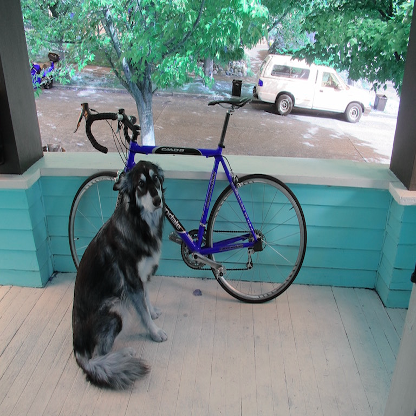

In [13]:
import numpy as np
import tensorflow.keras as K
import cv2
import os
from google.colab.patches import cv2_imshow

np.random.seed(2)

anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                    [[30, 61], [62, 45], [59, 119]],
                    [[10, 13], [16, 30], [33, 23]]])

yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)

images, image_paths = yolo.load_images('/content/drive/MyDrive/dataset/yolo/')
image_paths, images = zip(*sorted(zip(image_paths, images)))
pimages, image_shapes = yolo.preprocess_images(images)

print(type(pimages), pimages.shape)
print(type(image_shapes), image_shapes.shape)

i = np.random.randint(0, len(images))
print(images[i].shape, ':', image_shapes[i])

# Usando cv2_imshow en lugar de cv2.imshow
cv2_imshow(cv2.cvtColor((pimages[i] * 255).astype('uint8'), cv2.COLOR_BGR2RGB))


In [14]:
#!/usr/bin/env python3
""" Doc """
import numpy as np
import tensorflow.keras as K
import cv2
import os


class Yolo:
    """Yolo class for object detection"""
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """Initializes the Yolo class"""
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]
        self.input_h = self.model.input.shape[1]
        self.input_w = self.model.input.shape[2]

    @staticmethod
    def sigmoid(x):
        """Applies the sigmoid function"""
        return 1 / (1 + np.exp(-x))

    def process_outputs(self, outputs, image_size):
        """Processes the outputs"""
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices((
                g_w, g_h)).T, anchors.shape[0]).reshape(
                    (g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs

    def filter_boxes(self, boxes, box_confidences, box_class_probs):
        """Filters boxes based on class scores"""
        filtered_boxes = []
        box_classes = []
        box_scores = []

        for i, b in enumerate(boxes):
            bc = box_confidences[i]
            bcp = box_class_probs[i]

            bs = bc * bcp

            bcs = np.max(bs, axis=-1)
            bc1 = np.argmax(bs, axis=-1)

            idx = np.where(bcs >= self.class_t)

            filtered_boxes.append(b[idx])
            box_classes.append(bc1[idx])
            box_scores.append(bcs[idx])

        return np.concatenate(
            filtered_boxes), np.concatenate(
                box_classes), np.concatenate(box_scores)

    def non_max_suppression(self, filtered_boxes, box_classes, box_scores):
        """Performs non-maximum suppression"""
        box_predictions = []
        predicted_box_classes = []
        predicted_box_scores = []

        classes = np.unique(box_classes)

        for c in classes:
            idx = np.where(box_classes == c)
            b = filtered_boxes[idx]
            bc1 = box_classes[idx]
            bs = box_scores[idx]

            ordered_indices = np.flip(bs.argsort(), axis=0)

            while len(ordered_indices) > 0:
                maximum = ordered_indices[0]
                box_predictions.append(b[maximum])
                predicted_box_classes.append(bc1[maximum])
                predicted_box_scores.append(bs[maximum])

                if len(ordered_indices) == 1:
                    break

                remaining = ordered_indices[1:]

                ious = np.zeros((len(remaining)))
                for i, idx in enumerate(remaining):
                    xi1 = max(b[maximum, 0], b[idx, 0])
                    yi1 = max(b[maximum, 1], b[idx, 1])
                    xi2 = min(b[maximum, 2], b[idx, 2])
                    yi2 = min(b[maximum, 3], b[idx, 3])
                    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

                    box1_area = (
                        b[maximum, 2] - b[maximum, 0]) * (
                            b[maximum, 3] - b[maximum, 1])
                    box2_area = (b[idx, 2] - b[idx, 0]) * (
                        b[idx, 3] - b[idx, 1])
                    union_area = box1_area + box2_area - inter_area

                    ious[i] = inter_area / union_area

                ordered_indices = remaining[ious <= self.nms_t]

        box_predictions = np.array(box_predictions)
        predicted_box_classes = np.array(predicted_box_classes)
        predicted_box_scores = np.array(predicted_box_scores)

        return box_predictions, predicted_box_classes, predicted_box_scores

    @staticmethod
    def load_images(folder_path):
        """Loads images from a folder"""
        images = []
        image_paths = []

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                images.append(image)
                image_paths.append(image_path)

        return images, image_paths

    def preprocess_images(self, images):
        """Preprocesses a list of images for YOLO model"""
        input_h, input_w = self.input_h, self.input_w
        pimages = []
        image_shapes = []

        for image in images:
            image_shapes.append(image.shape[:2])
            resized_image = cv2.resize(
                image, (input_w, input_h), interpolation=cv2.INTER_CUBIC)
            pimage = resized_image / 255
            pimages.append(pimage)

        pimages = np.array(pimages)
        image_shapes = np.array(image_shapes)

        return pimages, image_shapes

    def show_boxes(self, image, boxes, box_classes, box_scores, file_name):
        """Displays the image with boxes, class names, and scores"""
        img_cp = image.copy()

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            class_index = box_classes[i]
            class_name = self.class_names[class_index]
            score = box_scores[i]

            # Draw box
            cv2.rectangle(img_cp, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

            # Write class name and score
            text = f"{class_name} {score:.2f}"
            cv2.putText(img_cp, text, (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        cv2_imshow(img_cp)
        key = cv2.waitKey(0)

        if key == ord('s'):
            output_dir = 'detections'
            os.makedirs(output_dir, exist_ok=True)
            output_path = os.path.join(output_dir, file_name)
            cv2.imwrite(output_path, img_cp)
            cv2.destroyAllWindows()
        else:
            cv2.destroyAllWindows()

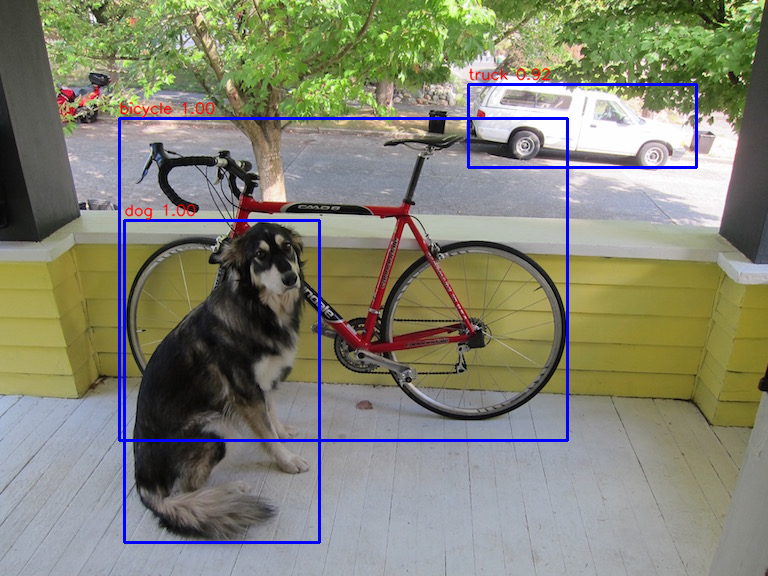

In [15]:
np.random.seed(0)
anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                    [[30, 61], [62, 45], [59, 119]],
                    [[10, 13], [16, 30], [33, 23]]])
yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)
images, image_paths = yolo.load_images('/content/drive/MyDrive/dataset/yolo')
boxes = np.array([[119.22100287, 118.62197718, 567.75985556, 440.44121152],
                  [468.53530752, 84.48338278, 696.04923556, 167.98947829],
                  [124.2043716, 220.43365057, 319.4254314 , 542.13706101]])
box_scores = np.array([0.99537075, 0.91536146, 0.9988506])
box_classes = np.array([1, 7, 16])
ind = 0
for i, name in enumerate(image_paths):
    if "dog.jpg" in name:
        ind = i
        break
yolo.show_boxes(images[i], boxes, box_classes, box_scores, "dog.jpg")

In [22]:
import numpy as np
import tensorflow.keras as K
import cv2
import os
from google.colab.patches import cv2_imshow  # Ensure to import cv2_imshow for Google Colab

class Yolo:
    """Yolo class for object detection"""
    def __init__(self, model_path, classes_path, class_t, nms_t, anchors):
        """Initializes the Yolo class"""
        self.class_t = class_t
        self.nms_t = nms_t
        self.model = K.models.load_model(model_path)
        self.anchors = anchors
        with open(classes_path) as f:
            self.class_names = [line.strip() for line in f.readlines()]
        self.input_h = self.model.input.shape[1]
        self.input_w = self.model.input.shape[2]

    @staticmethod
    def sigmoid(x):
        """Applies the sigmoid function"""
        return 1 / (1 + np.exp(-x))

    def process_outputs(self, outputs, image_size):
        """Processes the outputs"""
        boxes = []
        box_confidences = []
        box_class_probs = []

        for i, output in enumerate(outputs):
            anchors = self.anchors[i]
            g_h, g_w = output.shape[:2]

            t_xy = output[..., :2]
            t_wh = output[..., 2:4]

            sigmoid_conf = self.sigmoid(output[..., 4])
            sigmoid_prob = self.sigmoid(output[..., 5:])

            box_conf = np.expand_dims(sigmoid_conf, axis=-1)
            box_class_prob = sigmoid_prob

            box_confidences.append(box_conf)
            box_class_probs.append(box_class_prob)

            b_wh = anchors * np.exp(t_wh)
            b_wh /= self.model.input.shape.as_list()[1:3]

            grid = np.tile(np.indices((
                g_w, g_h)).T, anchors.shape[0]).reshape(
                    (g_h, g_w) + anchors.shape)

            b_xy = (self.sigmoid(t_xy) + grid) / [g_w, g_h]

            b_xy1 = b_xy - (b_wh / 2)
            b_xy2 = b_xy + (b_wh / 2)
            box = np.concatenate((b_xy1, b_xy2), axis=-1)
            box *= np.tile(np.flip(image_size, axis=0), 2)

            boxes.append(box)

        return boxes, box_confidences, box_class_probs

    def filter_boxes(self, boxes, box_confidences, box_class_probs):
        """Filters boxes based on class scores"""
        filtered_boxes = []
        box_classes = []
        box_scores = []

        for i, b in enumerate(boxes):
            bc = box_confidences[i]
            bcp = box_class_probs[i]

            bs = bc * bcp

            bcs = np.max(bs, axis=-1)
            bc1 = np.argmax(bs, axis=-1)

            idx = np.where(bcs >= self.class_t)

            filtered_boxes.append(b[idx])
            box_classes.append(bc1[idx])
            box_scores.append(bcs[idx])

        return np.concatenate(filtered_boxes), np.concatenate(box_classes), np.concatenate(box_scores)

    def non_max_suppression(self, filtered_boxes, box_classes, box_scores):
        """Performs non-maximum suppression"""
        box_predictions = []
        predicted_box_classes = []
        predicted_box_scores = []

        classes = np.unique(box_classes)

        for c in classes:
            idx = np.where(box_classes == c)
            b = filtered_boxes[idx]
            bc1 = box_classes[idx]
            bs = box_scores[idx]

            ordered_indices = np.flip(bs.argsort(), axis=0)

            while len(ordered_indices) > 0:
                maximum = ordered_indices[0]
                box_predictions.append(b[maximum])
                predicted_box_classes.append(bc1[maximum])
                predicted_box_scores.append(bs[maximum])

                if len(ordered_indices) == 1:
                    break

                remaining = ordered_indices[1:]

                ious = np.zeros((len(remaining)))
                for i, idx in enumerate(remaining):
                    xi1 = max(b[maximum, 0], b[idx, 0])
                    yi1 = max(b[maximum, 1], b[idx, 1])
                    xi2 = min(b[maximum, 2], b[idx, 2])
                    yi2 = min(b[maximum, 3], b[idx, 3])
                    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)

                    box1_area = (
                        b[maximum, 2] - b[maximum, 0]) * (
                            b[maximum, 3] - b[maximum, 1])
                    box2_area = (b[idx, 2] - b[idx, 0]) * (
                        b[idx, 3] - b[idx, 1])
                    union_area = box1_area + box2_area - inter_area

                    ious[i] = inter_area / union_area

                ordered_indices = remaining[ious <= self.nms_t]

        box_predictions = np.array(box_predictions)
        predicted_box_classes = np.array(predicted_box_classes)
        predicted_box_scores = np.array(predicted_box_scores)

        return box_predictions, predicted_box_classes, predicted_box_scores

    @staticmethod
    def load_images(folder_path):
        """Loads images from a folder"""
        images = []
        image_paths = []

        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                images.append(image)
                image_paths.append(image_path)

        return images, image_paths

    def preprocess_images(self, images):
        """Preprocesses images for prediction"""
        input_h, input_w = self.input_h, self.input_w
        pimages = []
        image_shapes = []

        for image in images:
            image_shapes.append(image.shape[:2])
            resized_image = cv2.resize(
                image, (input_w, input_h), interpolation=cv2.INTER_CUBIC)
            pimage = resized_image / 255
            pimages.append(pimage)

        pimages = np.array(pimages)
        image_shapes = np.array(image_shapes)

        return pimages, image_shapes

    def show_boxes(self, image, boxes, box_classes, box_scores, file_name):
        """Displays the image with bounding boxes, class names, and scores"""
        img_copy = np.copy(image)
        for box, cls, score in zip(boxes, box_classes, box_scores):
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
            text = f'{self.class_names[cls]}: {score:.2f}'
            cv2.putText(img_copy, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        cv2_imshow(img_copy)

        while True:
            key = cv2.waitKey(1) & 0xFF
            if key == ord('s'):
                detections_dir = 'detections'
                if not os.path.exists(detections_dir):
                    os.makedirs(detections_dir)
                save_path = os.path.join(detections_dir, file_name)
                cv2.imwrite(save_path, img_copy)
                break
            elif key == 27:  # ESC key to exit without saving
                break

        cv2.destroyAllWindows()

    def predict(self, folder_path):
        """Predicts on all images in the folder and displays results"""
        images, image_paths = self.load_images(folder_path)
        predictions = []
        for image, path in zip(images, image_paths):
            image_name = os.path.basename(path)
            preprocessed_image, _ = self.preprocess_images([image])
            outputs = self.model.predict(preprocessed_image)
            boxes, box_confidences, box_class_probs = self.process_outputs(outputs, image.shape[:2])
            filtered_boxes, box_classes, box_scores = self.filter_boxes(boxes, box_confidences, box_class_probs)
            box_predictions, predicted_box_classes, predicted_box_scores = self.non_max_suppression(filtered_boxes, box_classes, box_scores)
            self.show_boxes(image, box_predictions, predicted_box_classes, predicted_box_scores, image_name)
            predictions.append((box_predictions, predicted_box_classes, predicted_box_scores))

        return predictions, image_paths


1/1 [==============================] - 2s 2s/step


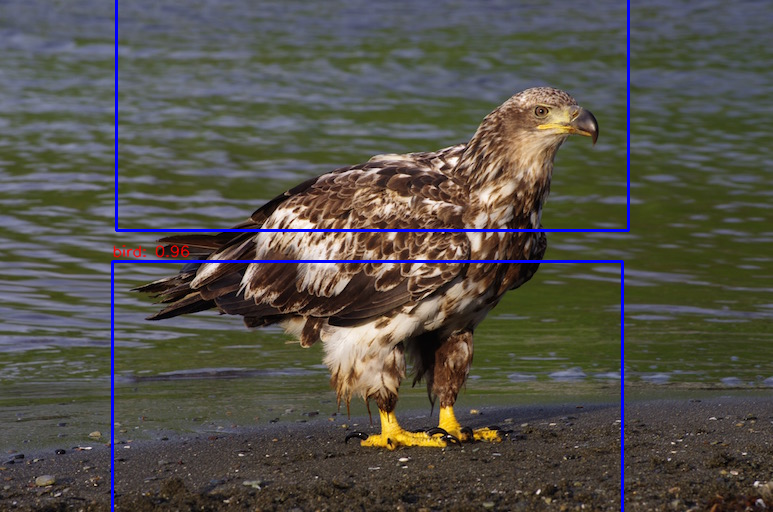

KeyboardInterrupt: 

In [23]:
np.random.seed(0)
anchors = np.array([[[116, 90], [156, 198], [373, 326]],
                    [[30, 61], [62, 45], [59, 119]],
                    [[10, 13], [16, 30], [33, 23]]])
yolo = Yolo('/content/drive/MyDrive/dataset/yolo.h5', '/content/drive/MyDrive/dataset/coco_classes.txt', 0.6, 0.5, anchors)
predictions, image_paths = yolo.predict('/content/drive/MyDrive/dataset/yolo')
for i, name in enumerate(image_paths):
    if "dog.jpg" in name:
        ind = i
        break
print(image_paths[ind])
print(predictions[ind])